In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаем данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создадим новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

In [3]:
workouts

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642
2,31412167,750.0,2020-11-28 13:00:00,success,regular,22034,new,general,Spartacus,940642
3,31703605,750.0,2020-12-05 13:00:00,success,regular,22034,active,general,Spartacus,940642
4,26904500,NaN,2020-08-06 18:20:00,success,trial,88101,NaN,general,Sales,3826530
...,...,...,...,...,...,...,...,...,...,...
104688,30976738,750.0,2020-11-19 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104689,31118199,750.0,2020-11-21 11:00:00,success,regular,4831015,active,general,Spartacus,6684752
104690,31118238,750.0,2020-11-26 08:00:00,success,single,4831015,active,general,Spartacus,6684752
104691,31600293,750.0,2020-12-03 08:00:00,success,regular,4831015,active,general,Spartacus,6684752



В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построим гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября.**

In [4]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [5]:
# взяли тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# берем только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [6]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# превращаем series в dataframe, сбрасываем индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываем столбец workout_id
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8
...,...,...,...
1612,10787796,Sales,1
1613,10790388,Sales,2
1614,10790715,Sales,2
1615,10803397,Sales,2


In [7]:
# посмотрим, какие у нас есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments


{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

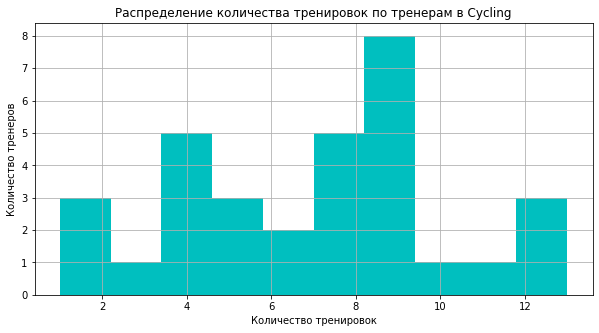

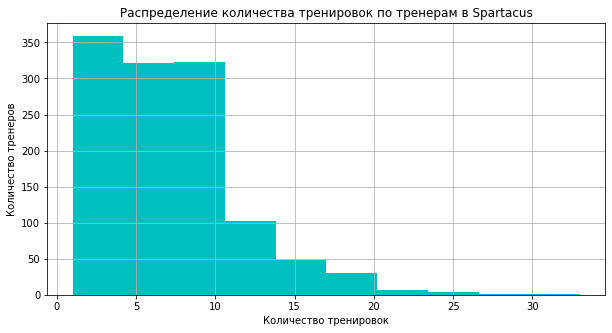

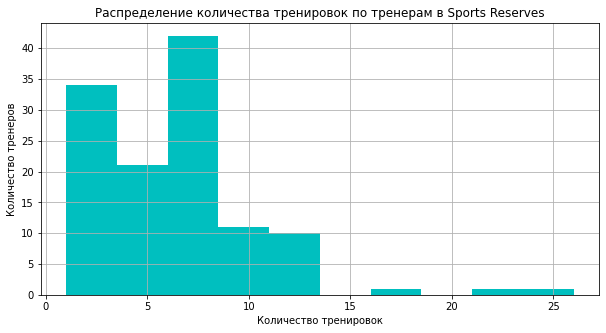

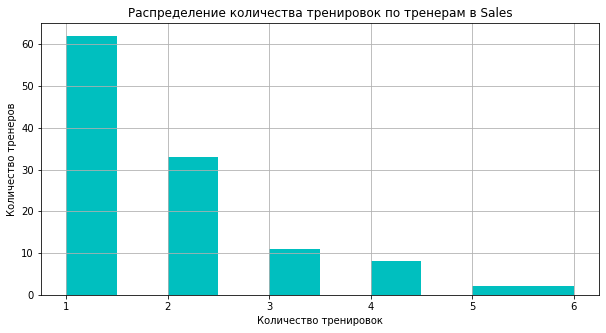

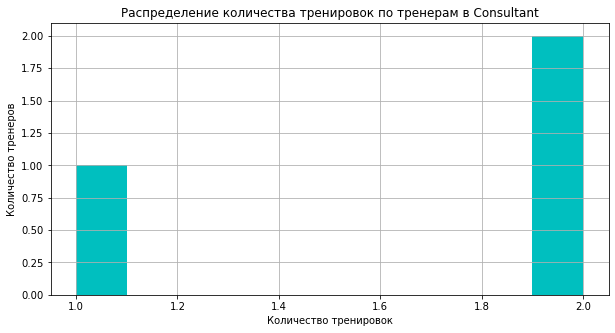

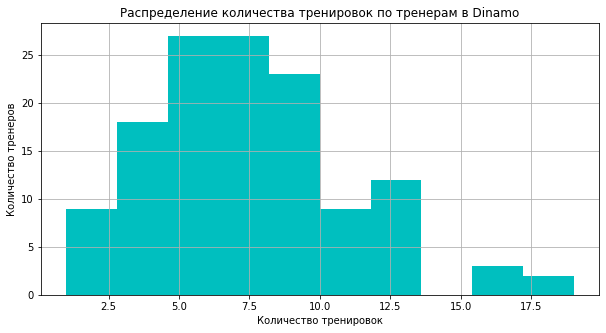

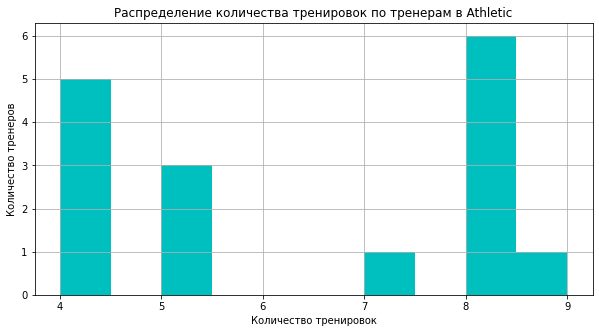

In [8]:
for department in departments:
    to_hist = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == department]
    to_hist = to_hist[['workouts','trainer_id']].set_index('trainer_id')
    plt.figure(figsize=(10,5))
    plt.title(f'Распределение количества тренировок по тренерам в {department}') 
    plt.xlabel('Количество тренировок') 
    plt.ylabel('Количество тренеров') 
    plt.grid() # сетка

    plt.hist(to_hist, bins=10, color='c')
    plt.show()

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построим boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**


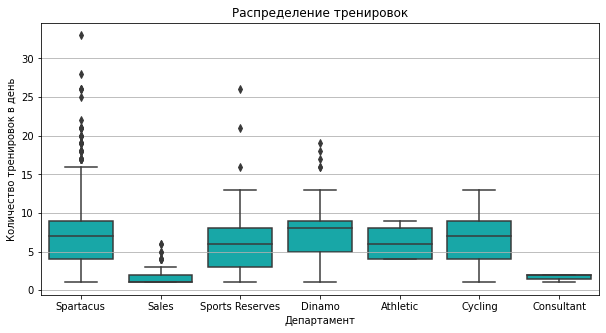

In [9]:
# напиши код здесь
plt.figure(figsize=(10, 5))  # Зададим размер фигуры
plt.title('Распределение тренировок') # Подпишем заголовок графика
plt.grid() # сетка
#отрисовываем ящик с усами
sns.boxplot(x='trainer_department',
            y='workouts',
            data = workouts_by_trainer, 
            color='c')
plt.xlabel('Департамент') # Подпишем ось X (в seaborn - после построения графика)
plt.ylabel('Количество тренировок в день')
plt.show()



Во всех департаментах кроме Sales и Concultant среднее количество тренировок находится на высоком уровне, из числа лидеров стоит выделить Spartacus, Dinamo Департамент. 
Стоит отметить, что в Spartacus наблюдается большое количество перегруженных тренеров. Также выбросы зафиксированы по таким департаментам как Sales, Sports Reserves, Dinamo Департамент.